<a href="https://colab.research.google.com/github/HectorGtz27/Data-Science-Project/blob/main/Fase_4_Modelaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # importa la librería pandas y la asigna a la variable pd

In [ ]:
datos_consumo = pd.read_excel('A01253031_Registro-1_Avance.xlsx') # indicamos el nombre de nuestro archivo a ser leído

In [ ]:
datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
0,2022-08-17,Desayuno,Huevo con tortilla,303,23.0,17.0,16.0,233,MyFitnessPal
1,2022-08-17,Comida,Pollo asado,422,2.0,19.0,60.0,2,MyFitnessPal
2,2022-08-17,Cena,Quesadillas con frijoles,572,51.0,29.0,29.0,702,MyFitnessPal
3,2022-08-17,Snack,Nito,252,37.0,10.0,3.0,10,MyFitnessPal
4,2022-08-17,Snack,5 Picafresas,100,25.0,0.0,0.0,225,MyFitnessPal


In [ ]:
datos_consumo.groupby("Momento").count() # con la función groupby agrupamos los datos de la columna Momento y con count() los contamos para obtener subtotales

,Fecha (dd/mm/aa),Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
Momento,,,,,,,,
Cena,78,78,78,78,78,78,78,78
Comida,78,78,78,78,78,78,78,78
Desayuno,76,76,76,76,76,76,76,76
Desyuno,2,2,2,2,2,2,2,2
Snack,157,157,157,157,157,157,157,157


In [ ]:
datos_consumo.describe()

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
count,391.000000,391.000000,391.000000,391.000000,391.000000
mean,327.138107,31.956266,15.460102,16.352174,499.051151
std,206.084178,25.044617,11.659966,14.591866,523.009822
min,40.000000,0.000000,0.000000,0.000000,0.000000
25%,165.000000,16.000000,7.000000,2.000000,180.000000
50%,300.000000,30.000000,13.000000,12.000000,320.000000
75%,406.000000,37.200000,21.950000,29.000000,702.000000
max,1061.000000,115.000000,68.000000,65.000000,3110.000000


In [ ]:
datos_seleccionados = datos_consumo.iloc[:,3:8] # : selecciona todas las filas y 3:8(-1) seleccion columnas de la 4 la 7

datos_seleccionados # desplegamos el dataframe

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,303,23.0,17.0,16.0,233
1,422,2.0,19.0,60.0,2
2,572,51.0,29.0,29.0,702
3,252,37.0,10.0,3.0,10
4,100,25.0,0.0,0.0,225
...,...,...,...,...,...
386,366,26.3,26.5,8.0,334
387,330,30.0,22.0,3.0,500
388,1052,115.0,49.0,36.0,1710
389,470,52.0,26.0,8.0,3110


In [ ]:
datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calorías (kcal)     391 non-null    int64  
 1   Carbohidratos (g)   391 non-null    float64
 2   Lípidos/grasas (g)  391 non-null    float64
 3   Proteína (g)        391 non-null    float64
 4   Sodio (mg)          391 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 15.4 KB


In [ ]:
datos_seleccionados.isnull().values.any() # buscamos valores nulos y obtenemos True o False dependiendo si hay o no

dataset = datos_seleccionados.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

Calorías (kcal)       0
Carbohidratos (g)     0
Lípidos/grasas (g)    0
Proteína (g)          0
Sodio (mg)            0
dtype: int64

In [ ]:
dataset.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

X = dataset[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']].values # variables independientes

y = dataset['Calorías (kcal)'].values # variable dependiente

In [ ]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba

In [ ]:
from sklearn.linear_model import LinearRegression # importamos la clase de regresión lineal

modelo_regresion = LinearRegression() # modelo de regresión

In [ ]:
modelo_regresion.fit(X_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [ ]:
x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
coeff_df # despliega los coefientes y sus valores; por cada unidad del coeficente, su impacto en las calorías será igual a su valo

,Coeficientes
Carbohidratos (g),4.142930
Lípidos/grasas (g),9.060501
Proteína (g),3.985310
Sodio (mg),-0.011956


In [ ]:
y_pred = modelo_regresion.predict(X_test) # probamos nuestro modelo con los valores de prueba

In [ ]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred}) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion = validacion.head(25) # elegimos una muestra con 25 valores

muestra_validacion # desplegamos esos 25 valores

,Actual,Predicción,Diferencia
0,442,442.775806,-0.775806
1,180,196.270902,-16.270902
2,343,339.926061,3.073939
3,572,576.454573,-4.454573
4,140,137.308400,2.691600
5,130,127.873612,2.126388
6,406,501.111034,-95.111034
7,130,127.873612,2.126388
8,572,576.454573,-4.454573
9,401,372.666362,28.333638


In [ ]:
validacion["Diferencia"].describe()

count     79.000000
mean       1.176466
std       42.356121
min      -95.111034
25%       -3.895230
50%        2.691600
75%        7.564434
max      285.238360
Name: Diferencia, dtype: float64

In [ ]:
from sklearn.metrics import r2_score # importamos la métrica R cuadrada (coeficiente de determinación)

r2_score(y_test, y_pred) # ingresamos nuestros valores reales y calculados

0.9461940602031965

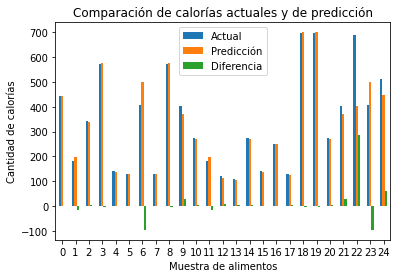

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("Comparación de calorías actuales y de predicción") # indicamos el título del gráfico

plt.xlabel("Muestra de alimentos") # indicamos la etiqueta del eje de las x, los alimentos

plt.ylabel("Cantidad de calorías") # indicamos la etiqueta del eje de las y, la cantidad de calorías

plt.show() # desplegamos el gráfico